# **Importing Libraries**

We start by importing the necessary libraries for data manipulation, visualization, and modeling.

- Pandas: Used for data manipulation and analysis, providing powerful data structures and functions to work with structured data.
- NumPy: Fundamental package for numerical computing in Python, used for array manipulation and mathematical operations.
- Matplotlib: Comprehensive library for creating static, interactive, and animated visualizations in Python.
- Seaborn: Data visualization library based on Matplotlib, providing a high-level interface for drawing attractive and informative statistical graphics.
- Scikit-learn: Simple and efficient tools for data mining and data analysis, providing various machine learning algorithms and utilities.
- XGBoost: Scalable and efficient implementation of gradient boosting algorithms, widely used for supervised learning tasks.
- LightGBM: Gradient boosting framework that uses tree-based learning algorithms, optimized for large-scale and distributed machine learning tasks.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# **Loading the datasets**

In [3]:
train_df = pd.read_csv("/content/drive/MyDrive/training dataset.csv")
test_df = pd.read_csv("/content/drive/MyDrive/test dataset.csv")

# **Understanding training dataset**

In [4]:
# Display basic information about the training dataset
print("Training Dataset Info:")
print(train_df.info())

# Display basic statistics of numerical features
print("\nTraining Dataset Statistics:")
print(train_df.describe())

# Check for missing values
print("\nMissing Values in Training Dataset:")
print(train_df.isnull().sum())

Training Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550176 entries, 0 to 550175
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ProductType        550176 non-null  object 
 1   Manufacturer       550176 non-null  object 
 2   Area Code          550176 non-null  object 
 3   Sourcing Channel   550176 non-null  object 
 4   Product Size       550176 non-null  object 
 5   Product Type       550176 non-null  object 
 6   Month of Sourcing  550176 non-null  object 
 7   Sourcing Cost      550176 non-null  float64
dtypes: float64(1), object(7)
memory usage: 33.6+ MB
None

Training Dataset Statistics:
       Sourcing Cost
count  550176.000000
mean      108.817286
std       104.390093
min      -196.070000
25%        57.000000
50%       132.000000
75%       146.150000
max     32632.500000

Missing Values in Training Dataset:
ProductType          0
Manufacturer         0
Area Code        

 Eight columns make up the 550,176 entries in the training dataset, seven of which are categorical and one of which is numerical (float64). The dataset has no missing values. The numerical characteristic "Sourcing Cost" has a mean of 108.82 and a standard deviation of 104.39. Its range is -196.07 to 32,632.50. Negative numbers in "Sourcing Cost" might be a sign of impending outliers or problems with the quality of the data.


# **Exploratory Data Analysis for better understanding**

### **Visualizing the distribution of the target variable i.e. sourcing cost**

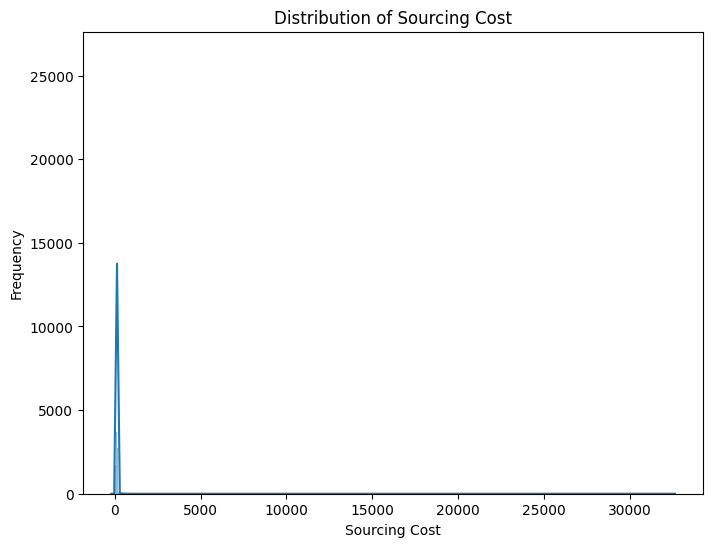

In [5]:
plt.figure(figsize=(8, 6))
sns.histplot(train_df['Sourcing Cost'], kde=True)
plt.title('Distribution of Sourcing Cost')
plt.xlabel('Sourcing Cost')
plt.ylabel('Frequency')
plt.show()

### **Count of Area Codes**

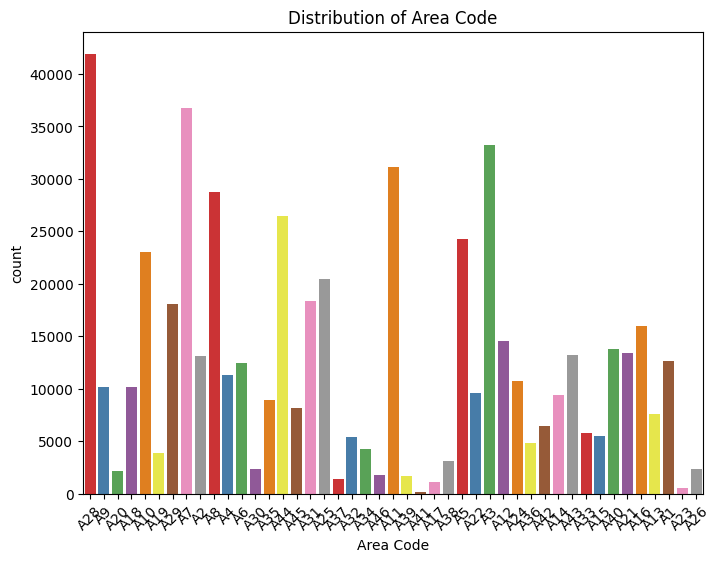

In [6]:
col=train_df["Area Code"]
plt.figure(figsize=(8, 6))
sns.countplot(x=col, data=train_df,palette="Set1")
plt.title('Distribution of Area Code')
plt.xticks(rotation=45)
plt.show()

### **Average Sourcing Cost by Month**

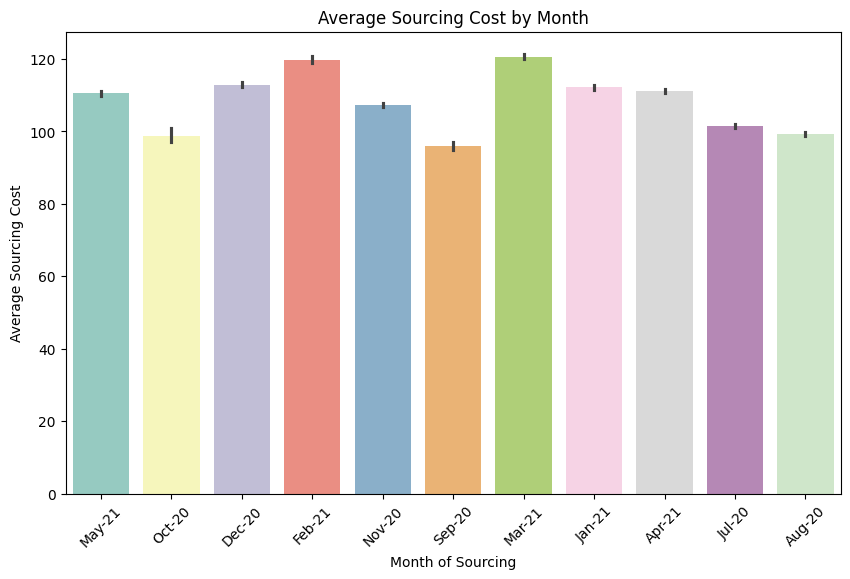

In [7]:
# Month-wise Sourcing Cost
plt.figure(figsize=(10, 6))
sns.barplot(x='Month of Sourcing', y='Sourcing Cost', data=train_df,palette="Set3", estimator=np.mean)
plt.title('Average Sourcing Cost by Month')
plt.xlabel('Month of Sourcing')
plt.ylabel('Average Sourcing Cost')
plt.xticks(rotation=45)
plt.show()

### **Total Count for other categorical variables**

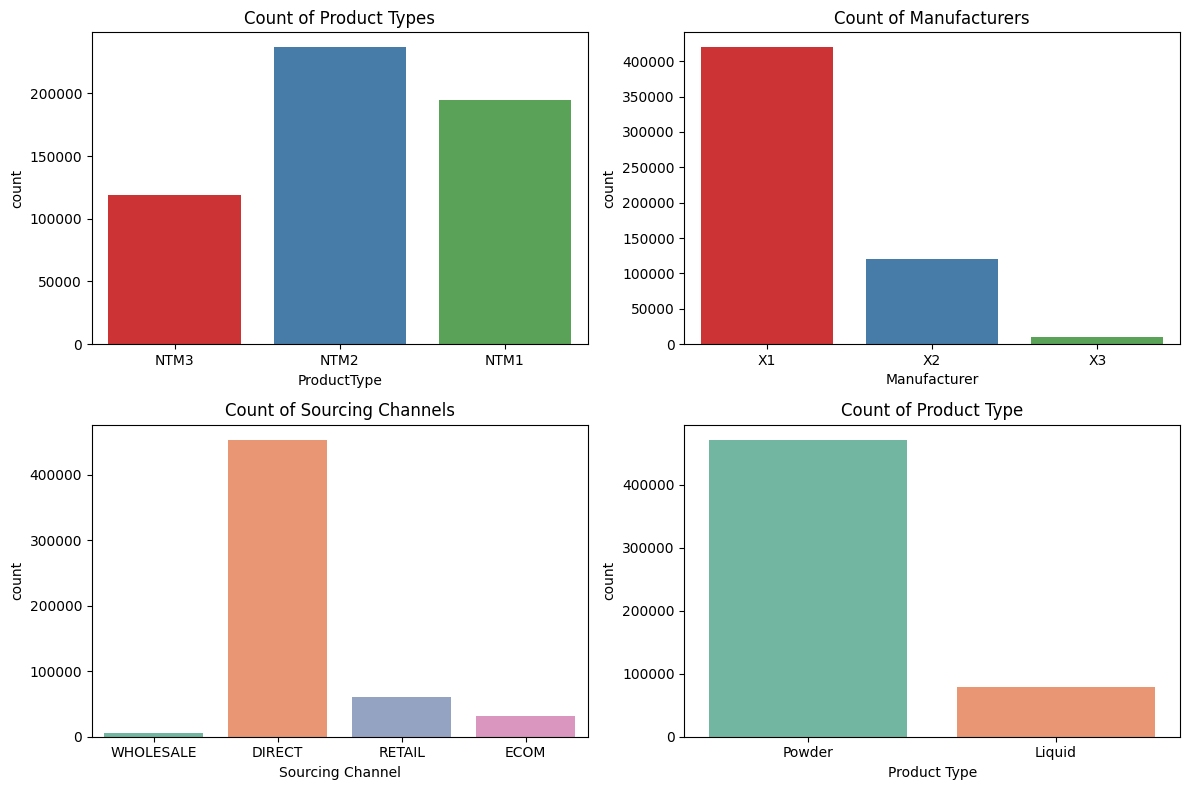

In [8]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.countplot(x='ProductType', data=train_df, palette='Set1')
plt.title('Count of Product Types')

plt.subplot(2, 2, 2)
sns.countplot(x='Manufacturer', data=train_df, palette='Set1')
plt.title('Count of Manufacturers')

plt.subplot(2, 2, 3)
sns.countplot(x='Sourcing Channel', data=train_df, palette='Set2')
plt.title('Count of Sourcing Channels')

plt.subplot(2, 2, 4)
sns.countplot(x='Product Type', data=train_df, palette='Set2')
plt.title('Count of Product Type')

plt.tight_layout()
plt.show()


# **Data Preprocessing**

### **Handle outliers using winsorization**

---
Winsorization is basically a statistical method used to lessen the influence of outliers in a dataset. It is substituting less extreme values for extreme ones, usually by setting the extreme values to a certain percentile of the data distribution. This lessens the impact of outliers on statistical estimations without completely eliminating them from the dataset.





In [9]:
# Handle outliers using winsorization
from scipy.stats.mstats import winsorize

# Winsorize the 'Sourcing Cost' column
train_df['Sourcing Cost Winsorized'] = winsorize(train_df['Sourcing Cost'], (0.05, 0.05))

# Encode categorical variables using one-hot encoding
train_encoded = pd.get_dummies(train_df.drop(['Sourcing Cost'], axis=1))
test_encoded = pd.get_dummies(test_df)


In [10]:
# Split the dataset into features and target variable
X_train = train_encoded.drop('Sourcing Cost Winsorized', axis=1)
y_train = train_encoded['Sourcing Cost Winsorized']
X_test = test_encoded

In [11]:
X_test_aligned = X_test.reindex(columns=X_train.columns, fill_value=0)

In [12]:
X_train

,ProductType_NTM1,ProductType_NTM2,ProductType_NTM3,Manufacturer_X1,Manufacturer_X2,Manufacturer_X3,Area Code_A1,Area Code_A10,Area Code_A11,Area Code_A12,...,Month of Sourcing_Aug-20,Month of Sourcing_Dec-20,Month of Sourcing_Feb-21,Month of Sourcing_Jan-21,Month of Sourcing_Jul-20,Month of Sourcing_Mar-21,Month of Sourcing_May-21,Month of Sourcing_Nov-20,Month of Sourcing_Oct-20,Month of Sourcing_Sep-20
0,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,False,True,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,True,False,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,False,False,True,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,False,True,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550171,False,True,False,True,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
550172,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
550173,False,True,False,True,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
550174,False,True,False,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [13]:
y_train

0          10.16
1         134.28
2          12.46
3         107.22
4         186.62
           ...  
550171    136.47
550172     72.56
550173    147.64
550174    150.04
550175    139.42
Name: Sourcing Cost Winsorized, Length: 550176, dtype: float64

In [14]:
X_test_aligned

,ProductType_NTM1,ProductType_NTM2,ProductType_NTM3,Manufacturer_X1,Manufacturer_X2,Manufacturer_X3,Area Code_A1,Area Code_A10,Area Code_A11,Area Code_A12,...,Month of Sourcing_Aug-20,Month of Sourcing_Dec-20,Month of Sourcing_Feb-21,Month of Sourcing_Jan-21,Month of Sourcing_Jul-20,Month of Sourcing_Mar-21,Month of Sourcing_May-21,Month of Sourcing_Nov-20,Month of Sourcing_Oct-20,Month of Sourcing_Sep-20
0,True,False,False,True,False,False,True,False,False,False,...,0,0,0,0,0,0,0,0,0,0
1,True,False,False,True,False,False,False,True,False,False,...,0,0,0,0,0,0,0,0,0,0
2,True,False,False,True,False,False,False,True,False,False,...,0,0,0,0,0,0,0,0,0,0
3,True,False,False,True,False,False,False,False,True,False,...,0,0,0,0,0,0,0,0,0,0
4,True,False,False,True,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,False,False,True,True,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
92,False,False,True,True,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
93,False,False,True,True,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
94,False,False,True,False,True,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0


# **Model Selection and Evaluation**

### **Linear Regression**
* A linear connection between features and the target variable is assumed in linear regression. Simple and easy to understand, it could perform poorly when dealing with nonlinear, complicated data.





In [15]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test_aligned)

### **Random Forest**
* Random Forest reduces overfitting and increases accuracy by constructing numerous decision trees and averaging their predictions.
It may need additional processing power, but it manages high-dimensional data effectively.


In [16]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test_aligned)

### **Decision Tree**
* Decision trees are simple and obvious to use since they divide data according to feature criteria.
They may not generalize well and have a tendency to overfit, collecting noise in the data.


In [17]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test_aligned)

### **XGBoost**
* XGBoost fixes faults in earlier models by building a sequence of trees one after the other.
It is very effective, scalable, and frequently produces cutting-edge outcomes.


In [18]:
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test_aligned)

### **LightGBM**
* Though it employs a different tree-building technique that emphasizes leaf-wise development, LightGBM is comparable to XGBoost.
It works well with big datasets and is quicker and more memory-efficient.





In [19]:
lgb_model = lgb.LGBMRegressor(random_state=42)
lgb_model.fit(X_train, y_train)
lgb_predictions = lgb_model.predict(X_test_aligned)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.114411 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 142
[LightGBM] [Info] Number of data points in the train set: 550176, number of used features: 71
[LightGBM] [Info] Start training from score 105.983723


### **Defining metrics for evaluation**

In [20]:
# Linear Regression
lr_mae = mean_absolute_error(test_df['Sourcing Cost'], lr_predictions)
lr_rmse = mean_squared_error(test_df['Sourcing Cost'], lr_predictions, squared=False)
lr_r2 = r2_score(test_df['Sourcing Cost'], lr_predictions)

# Decision Tree
dt_mae = mean_absolute_error(test_df['Sourcing Cost'], dt_predictions)
dt_rmse = mean_squared_error(test_df['Sourcing Cost'], dt_predictions, squared=False)
dt_r2 = r2_score(test_df['Sourcing Cost'], dt_predictions)

# Random Forest
rf_mae = mean_absolute_error(test_df['Sourcing Cost'], rf_predictions)
rf_rmse = mean_squared_error(test_df['Sourcing Cost'], rf_predictions, squared=False)
rf_r2 = r2_score(test_df['Sourcing Cost'], rf_predictions)

# XGBoost
xgb_mae = mean_absolute_error(test_df['Sourcing Cost'], xgb_predictions)
xgb_rmse = mean_squared_error(test_df['Sourcing Cost'], xgb_predictions, squared=False)
xgb_r2 = r2_score(test_df['Sourcing Cost'], xgb_predictions)

# LightGBM
lgb_mae = mean_absolute_error(test_df['Sourcing Cost'], lgb_predictions)
lgb_rmse = mean_squared_error(test_df['Sourcing Cost'], lgb_predictions, squared=False)
lgb_r2 = r2_score(test_df['Sourcing Cost'], lgb_predictions)

### **EVALUATION METRICS FOR COMPARISON BETWEEN MODELS**

In [21]:
print("\nEvaluation Metrics:")
print("Linear Regression:")
print("  MAE:", lr_mae)
print("  RMSE:", lr_rmse)
print("  R2 Score:", lr_r2)

print("\nDecision Tree:")
print("  MAE:", dt_mae)
print("  RMSE:", dt_rmse)
print("  R2 Score:", dt_r2)

print("\nRandom Forest:")
print("  MAE:", rf_mae)
print("  RMSE:", rf_rmse)
print("  R2 Score:", rf_r2)

print("\nXGBoost:")
print("  MAE:", xgb_mae)
print("  RMSE:", xgb_rmse)
print("  R2 Score:", xgb_r2)

print("\nLightGBM:")
print("  MAE:", lgb_mae)
print("  RMSE:", lgb_rmse)
print("  R2 Score:", lgb_r2)


Evaluation Metrics:
Linear Regression:
  MAE: 419221983067935.2
  RMSE: 419221983067935.1
  R2 Score: -6.478060670327464e+25

Decision Tree:
  MAE: 17.104711790601254
  RMSE: 33.23583180253546
  R2 Score: 0.592835392731653

Random Forest:
  MAE: 16.696280886348585
  RMSE: 33.20192356596056
  R2 Score: 0.5936657730954769

XGBoost:
  MAE: 16.66216066598892
  RMSE: 32.42457952056311
  R2 Score: 0.6124697389828091

LightGBM:
  MAE: 16.97013167691132
  RMSE: 32.183067811776624
  R2 Score: 0.6182212112817704


# **FINAL APPROACH**

#### ***After analyzing these models, I decided to forecast June 2021 values using XGBoost and LightGBM because of their better performance metrics (lower MAE, RMSE, and higher R2 score).***
#### ***When compared to random forests, decision trees, and linear regression, both models had lower error rates, higher accuracy, and greater variance explaining skills.They are also a good fit for predicting jobs because of their efficiency, scalability, and consistent performance—especially when working with bigger datasets like the one we have.***


## **Comparing values predicted by XGBoost and LightGBM with actual values from test dataset**


In [22]:
# Compare predicted values with actual values in the test dataset
test_df['XGBoost Predictions'] = xgb_predictions
test_df['LightGBM Predictions'] = lgb_predictions

# Display actual and predicted values for June 2021
print("Actual and Predicted Sourcing Cost for June 2021:")
print(test_df[['Sourcing Cost', 'XGBoost Predictions', 'LightGBM Predictions']])

Actual and Predicted Sourcing Cost for June 2021:
    Sourcing Cost  XGBoost Predictions  LightGBM Predictions
0          103.68           104.132835            106.008392
1          155.75           150.246689            149.908142
2          143.02           148.421143            149.666690
3          139.39           143.091080            144.505818
4          169.42           166.676987            167.697526
..            ...                  ...                   ...
91          89.57            65.254562             63.322224
92         114.57           122.427658            119.296969
93         111.26           103.740982            104.662081
94          32.32            60.677910             56.460625
95          40.73            51.087700             51.012190

[96 rows x 3 columns]


### **Both the XGBoost and LightGBM models seem to have done rather well when compared to the actual and expected sourcing prices for June 2021. All things considered, the models seem promising for sourcing cost forecasting.**